In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Loss Curves**

In [66]:
# model = "ResNet-50"
# model = "ResNet-101"
# model = "Swin-T"
model = "SegNet"

# Alivia's Paths
# train_loss_path = f"/content/drive/MyDrive/Final Year Project/8th Sem/Loss Plots/Results/{model}/train_loss.txt"
# valid_loss_path = f"/content/drive/MyDrive/Final Year Project/8th Sem/Loss Plots/Results/{model}/valid_loss.txt"

# Dibyarup's Paths
train_loss_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/{model}/train_loss.txt"
valid_loss_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/{model}/valid_loss.txt"

In [ ]:
pd.set_option('display.float_format', '{:.16f}'.format)

df_train = pd.read_csv(train_loss_path, delimiter="\t", names=["Epoch_No","Loss"])
# print(df_train, type(df_train))

df_valid = pd.read_csv(valid_loss_path, delimiter="\t", names=["Epoch_No","Loss"])
# print(df_valid, type(df_valid))

In [69]:
def filter_epoch_extractor(x):
    # This filter extracts the epoch number from the string of format -> Epoch[1/300]:
    first_split = str(x).split('[')[1]
    second_split = first_split.split('/')[0]
    return int(second_split)

df_train["Epoch_No"] = df_train["Epoch_No"].map(filter_epoch_extractor)

df_valid["Epoch_No"] = df_valid["Epoch_No"].map(filter_epoch_extractor)


In [70]:
# print(epoch_no_train)
# print(epoch_no_valid)

In [ ]:
df_train

In [ ]:
df_valid

<ipython-input-80-29430f9d0ea1>:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.5, 1.2, 0.000000001)


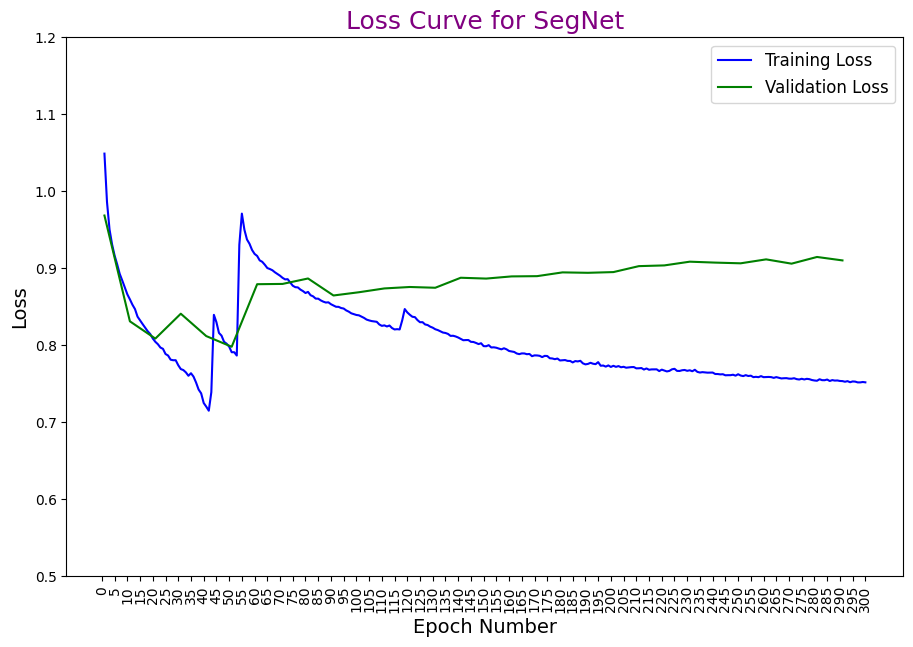

In [80]:
# Plotting
plt.figure(figsize=(10.8, 7.0))
plt.plot(df_train['Epoch_No'], df_train['Loss'], color='blue', label='Training Loss')
plt.plot(df_valid['Epoch_No'], df_valid['Loss'], color = 'green', label='Validation Loss')

# Scaling
plt.xticks(range(0, 301, 5), rotation=90)
plt.ylim(0.5, 1.2, 0.000000001)

# Adding Title and Labels
# plt.title(f"Loss Curve for RoadSegNN ({model} Backbone)", color='purple', fontsize=18) # RoadSegNN
plt.title(f"Loss Curve for {model}", color='purple', fontsize=18) # SegNet
plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize='large')
plt.show()
